In this notebook we will demonstrate how Polymake can be used to compute a Vietoris Rips complex and its homology on a random two dimensional point cloud. To read up on these concepts we suggest to take a look at: [Computational Topology: An Introduction](https://www.researchgate.net/publication/220692408_Computational_Topology_An_Introduction) by Herbert Edelsbrunner and John Harer. 

We will begin by checking on our system by calling `versioninfo()`. We can see the version of our Julia Kernel and some system specs.

In [6]:
versioninfo()

Julia Version 1.4.0
Commit b8e9a9ecc6 (2020-03-21 16:36 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-3770 CPU @ 3.40GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-8.0.1 (ORCJIT, ivybridge)


Then we check the status of our packagemanager and tell Julia which packages to use.

In [1]:
using Pkg
Pkg.status()

using Polymake
using Plots 
using Distances

Status `~/.julia/environments/v1.4/Project.toml`
  [1f15a43c] CxxWrap v0.9.1
  [b4f34e82] Distances v0.8.2
  [7073ff75] IJulia v1.21.1
  [91a5bcdd] Plots v1.0.5
  [d720cf60] Polymake v0.4.1
polymake version 4.0
Copyright (c) 1997-2020
Ewgenij Gawrilow, Michael Joswig, and the polymake team
Technische Universität Berlin, Germany
https://polymake.org

This is free software licensed under GPL; see the source for copying conditions.
There is NO warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



With this our setup is complete. We will begin by generating a random set of points via some of Julias basic functionality. Then we will plot these points using the "Plots" package.

In [117]:
points = rand(Float64, (16,2))


16×2 Array{Float64,2}:
 0.073776   0.861983
 0.255749   0.216406
 0.837399   0.18367
 0.451908   0.482145
 0.968421   0.898811
 0.727573   0.698121
 0.176284   0.384034
 0.0737789  0.301895
 0.824028   0.0618321
 0.411746   0.139417
 0.593904   0.453065
 0.457076   0.854046
 0.554123   0.0482456
 0.434838   0.316422
 0.899388   0.259067
 0.0597716  0.516415

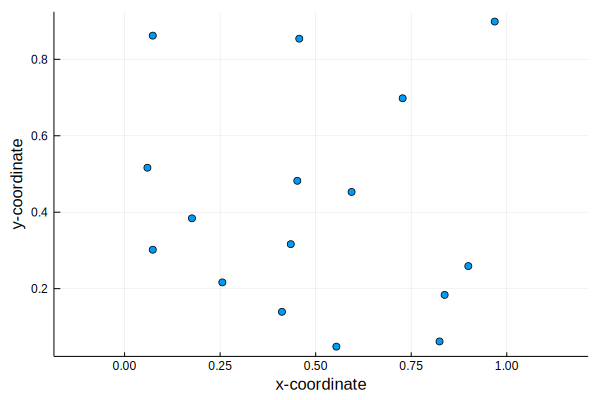

In [118]:
scatter(points[:,1],points[:,2],xlabel="x-coordinate",ylabel="y-coordinate",legend=false,aspect_ratio =:equal)

Polymake requires a distance matrix to compute the Vietoris rips complex. Here we use the "Distances" package to compute a $n x n$ matrix of pairwise distances, where $n$ is the number of points. 
We can specify which metric we want to use and choose the Euclidean metric. 

Setting `dims = 1` specifies that we want the pairwise distances of the rows of our matrix `points`.

In [119]:
distances = Distances.pairwise(Distances.Euclidean(),points,dims = 1)

16×16 Array{Float64,2}:
 0.0       0.670734  1.02139   0.535967  …  0.654219  1.02232   0.345851
 0.670734  0.0       0.582571  0.330297     0.205125  0.645052  0.358347
 1.02139   0.582571  0.0       0.487535     0.423885  0.097608  0.845827
 0.535967  0.330297  0.487535  0.0          0.1666    0.500002  0.393631
 0.895403  0.986701  0.727044  0.663623     0.789865  0.643458  0.985835
 0.674019  0.674291  0.526043  0.350196  …  0.481028  0.471475  0.692081
 0.488818  0.185509  0.69081   0.292566     0.267248  0.733823  0.176352
 0.560088  0.201051  0.772717  0.418894     0.361351  0.826719  0.214977
 1.09687   0.588927  0.12257   0.56137      0.465065  0.211141  0.889232
 0.7977    0.173961  0.427947  0.345074     0.178506  0.502107  0.515765
 0.661625  0.412742  0.36313   0.144943  …  0.209697  0.361878  0.537876
 0.383383  0.668668  0.770745  0.371937     0.538083  0.741377  0.521388
 0.944935  0.342499  0.313982  0.445777     0.29351   0.404541  0.680857
 0.654219  0.205125  0.4238

Now we can use Polymakes topaz library to generate the VR complex from our distance matrix. We also have to pass a float, indicating the maximum pairwise distance of vertices, such that they become a face of our abstract simplicial complex. 
Depending on our point set and the value we choose here, we get a higher or lower dimensional abstract simplicial complex. Note that if we'd choose a value of $1$ the generated abstract simplicial complex would contain all faces of the $n-$simplex.

In [130]:
vr = topaz.vietoris_rips_complex(distances, 0.33)
vr.FACETS

pm::Array<pm::Set<long, pm::operations::cmp>>
{0}
{1 6 7}
{1 6 13}
{1 9 13}
{2 8 12}
{2 8 14}
{3 6 13}
{3 10 13}
{4 5}
{5 10}
{5 11}
{6 7 15}
{9 12 13}


Above we can see the facets, encoded by sets of labeled vertices. Below we see a 
visualization of the VR complex provided by Polymake.

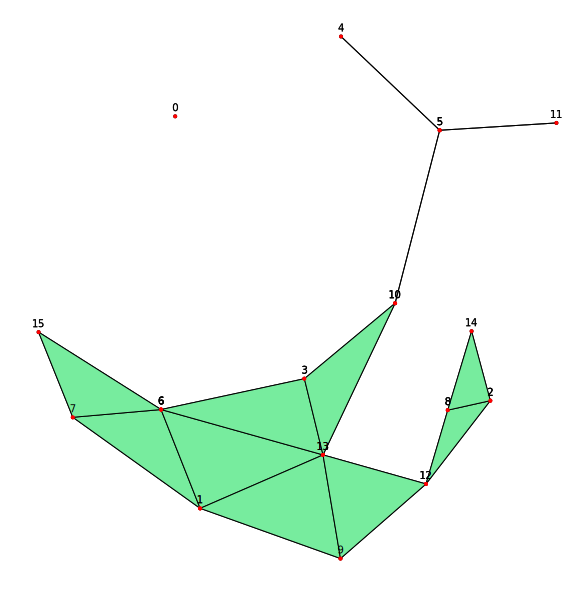

In [150]:
Polymake.display_svg(vr)

Finally we use another Polymake function to print the reduced homology of our complex. Each line corresponds to one dimension, starting with dimension $0$. The torsion coefficients are displayed in the curly brackets, which are empty if there is no torsion. The number after the curly brackets is the reduced Betti number.

In [132]:
vr.HOMOLOGY

PropertyValue wrapping pm::Array<polymake::topaz::HomologyGroup<pm::Integer>>
({} 1)
({} 0)
({} 0)
